### Introduction

Classical physics is a collection of theories that describe many phenomena of nature from the macroscopic point of view. Unfortunately classical physiscs is limited, and in order to describe nature from the miscroscopic point of view, we need to introduce quantum mechanics. One of the fundamental equations in quantum mechanics is Schrodinger equation, which determines the evolution of a quantum mechanics system in time. For our calculations we are going to use the time\-independent Schrodinger equation. In the most general case, the time\-independent Schrodinger equation is given by the formula\[1\]:

\begin{equation}
E(x)\psi =-\dfrac{\hslash^2}{2m} \, \dfrac{\mathrm{d}^2 \psi(x)}{\mathrm{d} x^2} + V\psi(x)
\end{equation}

and it can be used to describe the situation of a particle in a square well. The aim of this report is to plot the wave function for different values of $n$ for a particle in an infinite well, and for a particle in a infinite well with a potential box in the middle.



### Methods

In order to solve this problem we first defined an infinite well. \(fig.1\)


In [1]:
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import solve_ivp, simpson
from scipy.constants import hbar
import scipy as sp

(-51, 2)


Text(0.5, 1.0, 'fig.1: Infinite well')

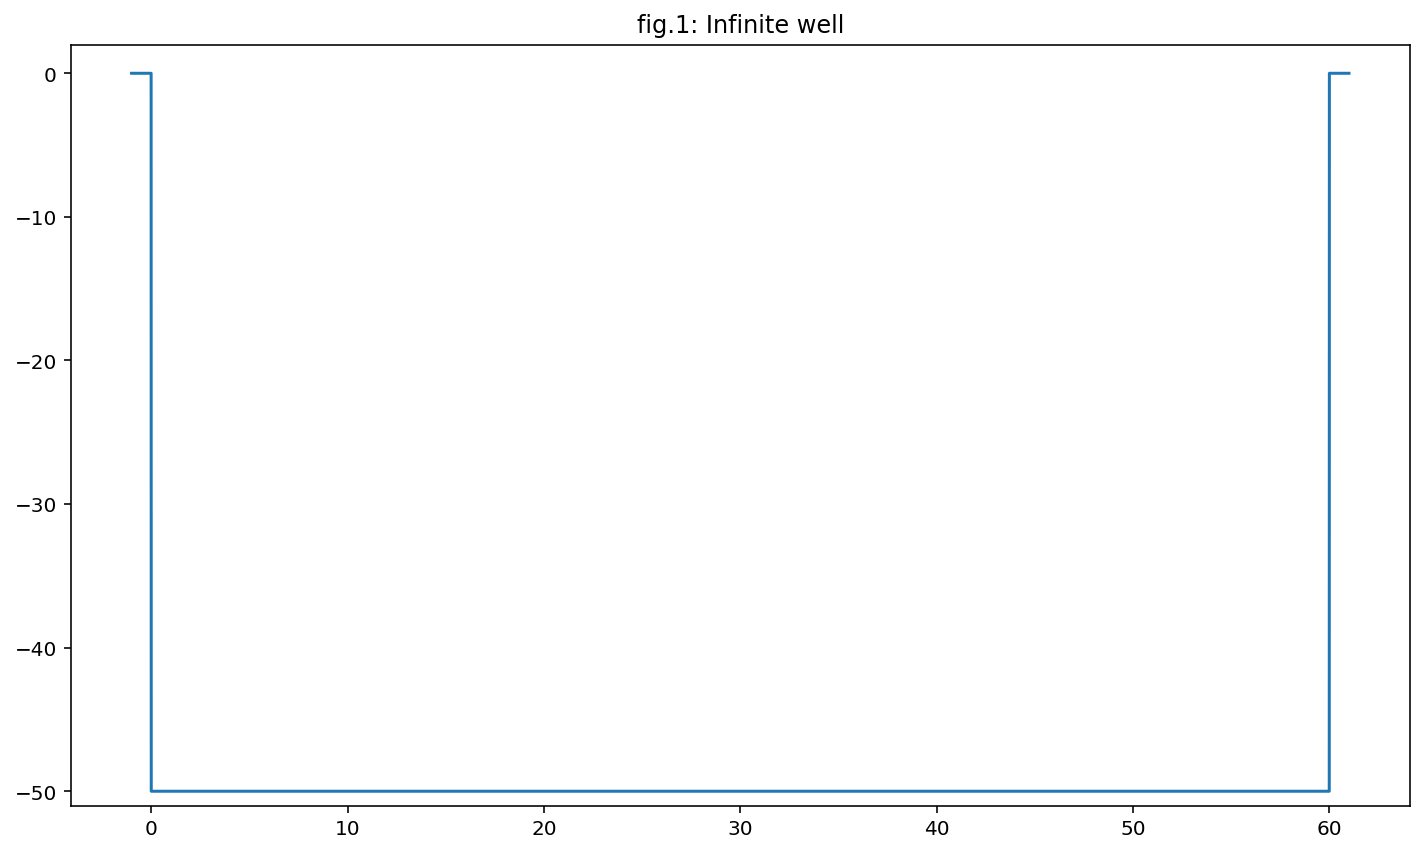

In [2]:
L = 30       #width of a single well  
gamma  = 50 #absolute value of the depth of the well / unitless 
x1 = np.linspace(0-1, 2*L+1, 11)

def V(x, V0=-gamma): #construction of wells 
    if np.iterable(x):
        return np.array([V(xi, V0) for xi in x])
    elif x < 0:
        return 0
    elif x >= 0 and x < L:
        return -gamma
    elif x >= L and x < 2*L:
        return -gamma
    elif x > 2*L:
        return 0
    
x1_plot = np.linspace(x1.min(), x1.max(), 10000)
print (plt.ylim(-gamma - 1, 0 + 2))
plt.plot(x1_plot, V(x1_plot))
plt.title("fig.1: Infinite well")

Then we used the "solve\_ivp" function in order to solve the Schrodinger equation, since it is a second order ODEs. By using realistic values and recalling that $E$ is given by the formula\[2\]: 

$$
\begin{equation}
E = \frac{n^2 \hbar^2 \pi^2}{2mL^2}\tag{2}
\end{equation}
$$

we could be able to plot the result of the energy for the first value of $n$. \(fig.2\)


Text(0.5, 1.0, 'fig.2: First energy level for infinite well')

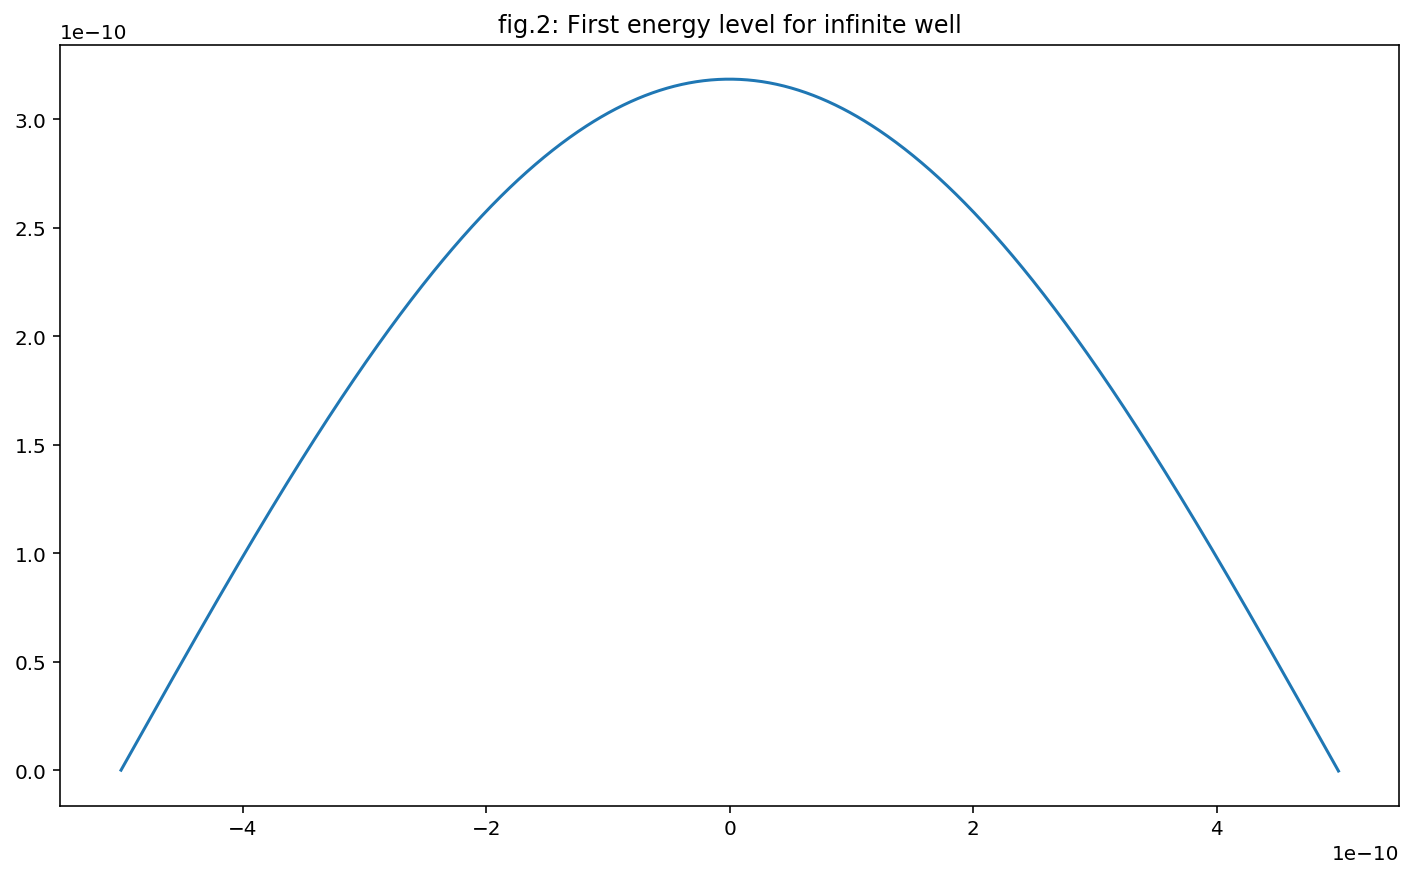

In [3]:
L = 1e-9
m = 9.11e-31
k = (2*m) / (hbar**2)
n = 1

En = ((n**2) * (np.pi**2) * (hbar**2)) / (2 * m * (L**2))
xmin = -L/2
xmax = L/2
npts = 1000
x_eval = np.linspace(xmin, xmax, npts)

psi_left = 0
dpsi_left = 1
values_list = []
def derivative_schro(x, psi, E):
    psi0, psi1 = psi
    dpsi1 = -k * psi0 * E
    return (psi1, dpsi1)

RK4_solution = solve_ivp(derivative_schro, (xmin, xmax), [psi_left, dpsi_left], t_eval = x_eval, args = (En, ))
plt.plot(RK4_solution.t, RK4_solution.y[0])
plt.title("fig.2: First energy level for infinite well")

Once that we checked that the graph \(fig.2\) describes the first energy level \($n = 1$\), we proceeded to find all the possible values of $n$, by computing an "Amplitude vs Energy" graph. \(fig.3\)


Text(0.5, 1.0, 'fig.3: Amplitude vs Energy (infinite well)')

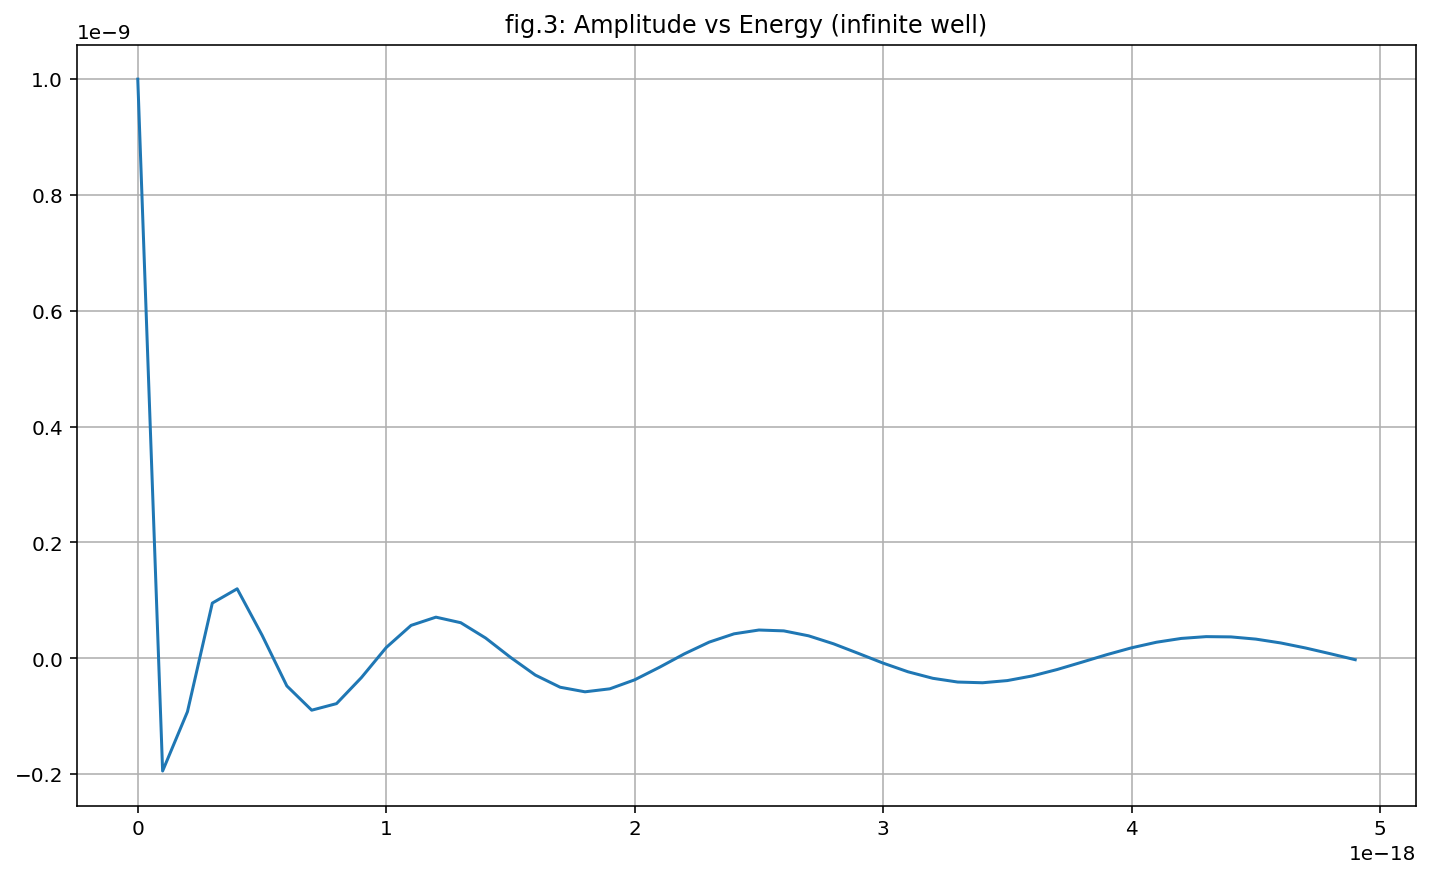

In [4]:
energy_list = []
amp_list = []
for i in range(50):
    En = i*(1e-19)
    energy_list.append(En)
    sol = solve_ivp(derivative_schro, (xmin, xmax), [psi_left, dpsi_left], t_eval = x_eval, args = (En, ))
    amp_list.append(sol.y[0][-1])
    
plt.plot(energy_list, amp_list)
plt.grid()
plt.title("fig.3: Amplitude vs Energy (infinite well)")

Since in our case we are considering an infinite well, the only values of the energy for which there is a zero probability to find the particle outside the boundaries, are the values when the function crosses the x\-axis, hence, these are the values that satisfy our equation. The values have been found by using the bisection method, where we can find the roots of an equation by dividing repeatedly an interval. We can get the lower and upper values of the interval by looking at the graph. \(fig.3\)


In [5]:
def right_boundary(E):
    psi_left = 0
    dpsi_left = 1
    solution = solve_ivp(derivative_schro, (xmin, xmax), [psi_left, dpsi_left], t_eval = x_eval, args = (E, ))
    return solution.y[0][-1]

def bisection_step(f, bounds):
    """Performs one step of the bisection algorithm to locate a root of f,
    and returns a smaller range in which the root is found.

    f: function of a single variable with a root within bounds
    bounds: tuple of two numbers representing the range to search for the root"""

    lower, upper = bounds      # "Unpack" the tuple so that we can manipulate the lower and upper bound separately
    middle = (lower + upper)/2 # Calculate the midpoint

    if f(lower)*f(middle) <0: # We want this code to run if f(l) and f(m) have opposite signs. Fill in the condition here
        return (lower, middle)
    else:
        return (middle, upper)
    
print("{:^20}  {:^25}  {:^20}  {:^14}".format("lower", "upper", "upper-lower", "iterations"))
l, u = 0.01e-18, 0.1e-18
iterations = 0
while u - l > 1e-22:
    l, u = bisection_step(right_boundary, (l, u))
    iterations = iterations + 1
    print("{:15.20f}  {:15.20f}  {:15.20f}  {:15.20f}".format(l, u, u-l, iterations))
    
print("{:^20}  {:^25}  {:^20}  {:^14}".format("lower", "upper", "upper-lower", "iterations"))
l, u = 0.2e-18, 0.4e-18
iterations = 0
while u - l > 1e-22:
    l, u = bisection_step(right_boundary, (l, u))
    iterations = iterations + 1
    print("{:15.20f}  {:15.20f}  {:15.20f}  {:15.20f}".format(l, u, u-l, iterations))
    
print("{:^20}  {:^25}  {:^20}  {:^14}".format("lower", "upper", "upper-lower", "iterations"))
l, u = 0.5e-18, 0.75e-18
iterations = 0
while u - l > 1e-22:
    l, u = bisection_step(right_boundary, (l, u))
    iterations = iterations + 1
    print("{:15.20f}  {:15.20f}  {:15.20f}  {:15.20f}".format(l, u, u-l, iterations))

       lower                    upper                upper-lower         iterations  
0.00000000000000000005  0.00000000000000000010  0.00000000000000000005  1.00000000000000000000
0.00000000000000000005  0.00000000000000000008  0.00000000000000000002  2.00000000000000000000
0.00000000000000000005  0.00000000000000000007  0.00000000000000000001  3.00000000000000000000
0.00000000000000000005  0.00000000000000000006  0.00000000000000000001  4.00000000000000000000
0.00000000000000000006  0.00000000000000000006  0.00000000000000000000  5.00000000000000000000
0.00000000000000000006  0.00000000000000000006  0.00000000000000000000  6.00000000000000000000
0.00000000000000000006  0.00000000000000000006  0.00000000000000000000  7.00000000000000000000
0.00000000000000000006  0.00000000000000000006  0.00000000000000000000  8.00000000000000000000
0.00000000000000000006  0.00000000000000000006  0.00000000000000000000  9.00000000000000000000
0.00000000000000000006  0.00000000000000000006  0.000000000

After checking that these procedure works, we worked out the energy levels of a particle in a well with a potential box in the middle, starting by plotting the well. \(fig.4\)


(-51, 2)


Text(0.5, 1.0, 'fig.4: infinite well with a potential box in the middle')

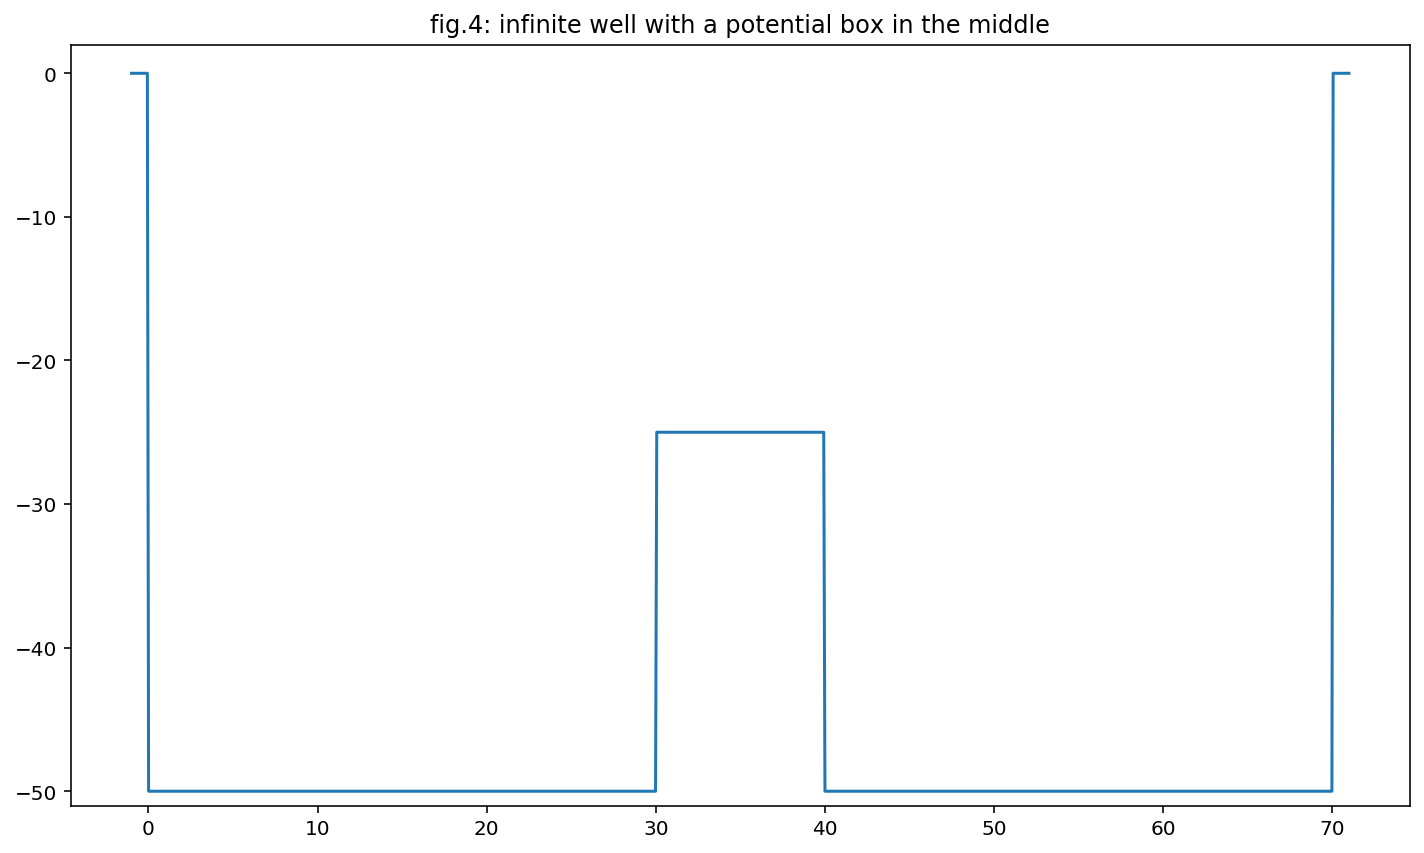

In [6]:
D = 10     #width of the box  
L = 30       #width of a single well  
gamma  = 50 #absolute value of the depth of the well / unitless 
gamma1 = 0
x1 = np.linspace(0-1, 2*L+D+1, 11)

def V(x, V0=-gamma,V1 = -gamma1): #construction of wells 
    if np.iterable(x):
        return np.array([V(xi, V0) for xi in x])
    elif x < 0:
        return 0
    elif x >= 0 and x < L:
        return -gamma
    elif x >= D and x < L + D:
        return -gamma/2
    elif x >= L + D and x < 2*L + D:
        return -gamma
    elif x > 2*L + D:
        return 0
    
x1_plot = np.linspace(x1.min(), x1.max(), 1000)
print (plt.ylim(-gamma - 1, 0 + 2))
plt.plot(x1_plot, V(x1_plot))
plt.title("fig.4: infinite well with a potential box in the middle")

After that, we follow the same procedure that we used for the infinite well, but this time we have 3 boudary conditions, since the potential box is going to affect the wave equation.


In [7]:
def derivative_schro_pot(x, psi, E, V):
    psi0, psi1 = psi
    dpsi1 = -k * psi0 * (E - V)  
    return (psi1, dpsi1)

Text(0.5, 1.0, 'fig.5: Amplitude vs Energy (infinite well with potential box)')

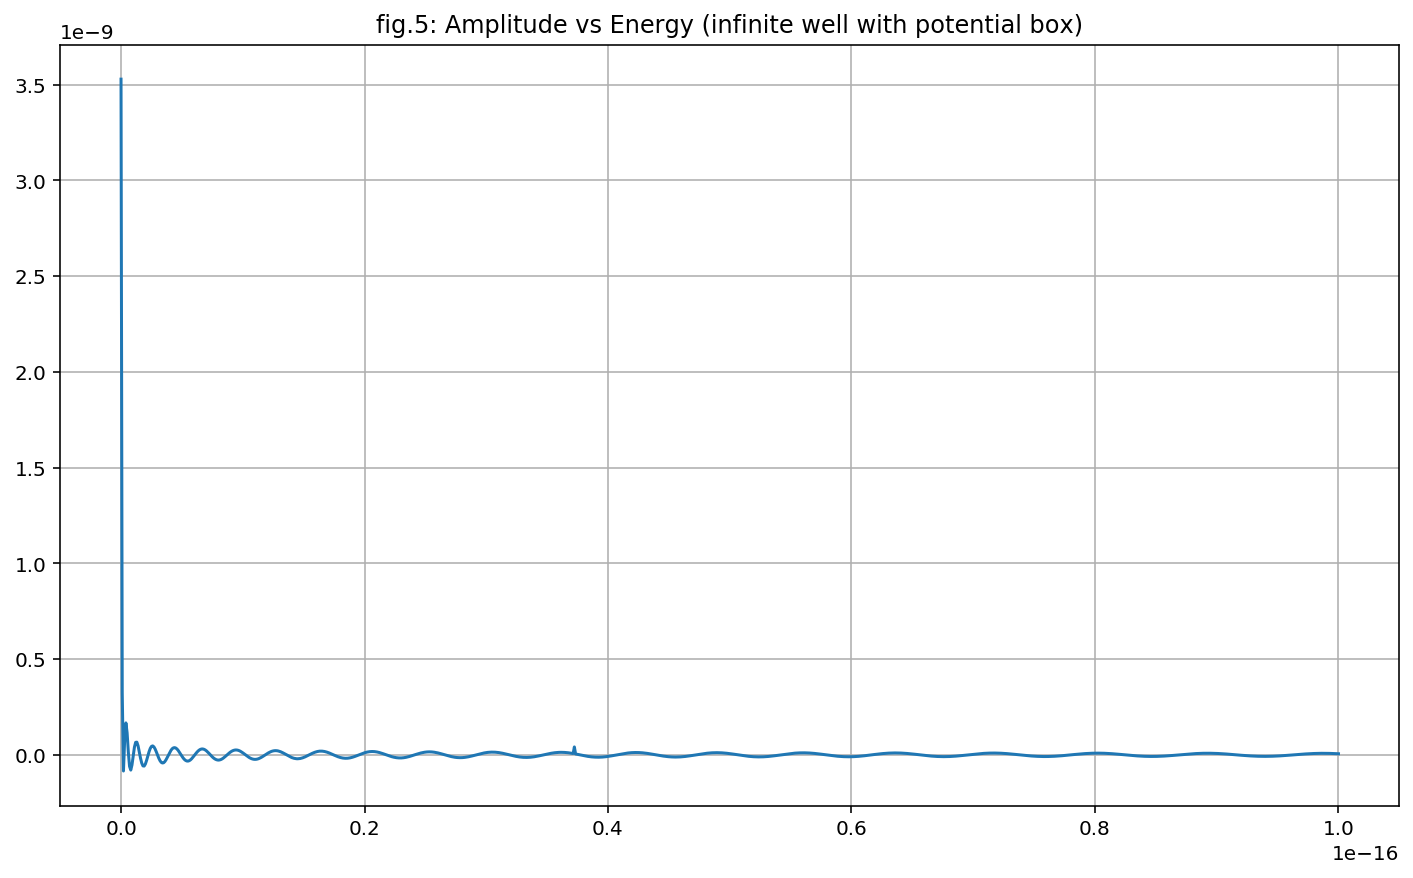

In [8]:
L = 1e-9
xmin = -L/2
xmax = L/2
xmin_well = -L/8
xmax_well = L/8
npts = 1000
first_well = np.linspace(xmin, xmin_well, npts)
first_well_V = 0
box = np.linspace(xmin_well, xmax_well)
box_V = 2e-19
second_well = np.linspace(xmax_well, xmax, npts)
second_well_V = 0
energy_values = np.linspace(0.01, 1000, npts)
psi_left = 0
dpsi_left = 1

energy_list_box = []
amp_list_box = []
for e in energy_values:
    En = e*(1e-19)
    energy_list_box.append(En)
    sol_first_well = solve_ivp(derivative_schro_pot, (xmin, xmin_well), [psi_left, dpsi_left], t_eval = first_well, args = (En, first_well_V))
    sol_box = solve_ivp(derivative_schro_pot, (xmin_well, xmax_well), [sol_first_well.y[0][-1], sol_first_well.y[1][-1]], t_eval = box, args = (En, box_V))
    sol_second_well = solve_ivp(derivative_schro_pot, (xmax_well, xmax), [sol_box.y[0][-1], sol_box.y[1][-1]], t_eval = second_well, args = (En, second_well_V))
    amp_list_box.append(sol_second_well.y[0][-1])


plt.plot(energy_list_box, amp_list_box)
plt.grid()
plt.title("fig.5: Amplitude vs Energy (infinite well with potential box)")

Using the same principle as before, by zooming in the previous graph \(fig.5\), we can see the points where the function crosses the x\-axis in the zoomed graph. \(fig.6\)


Text(0.5, 1.0, 'fig.6: Amplitude vs Energy zoomed (infinite well with potential box)')

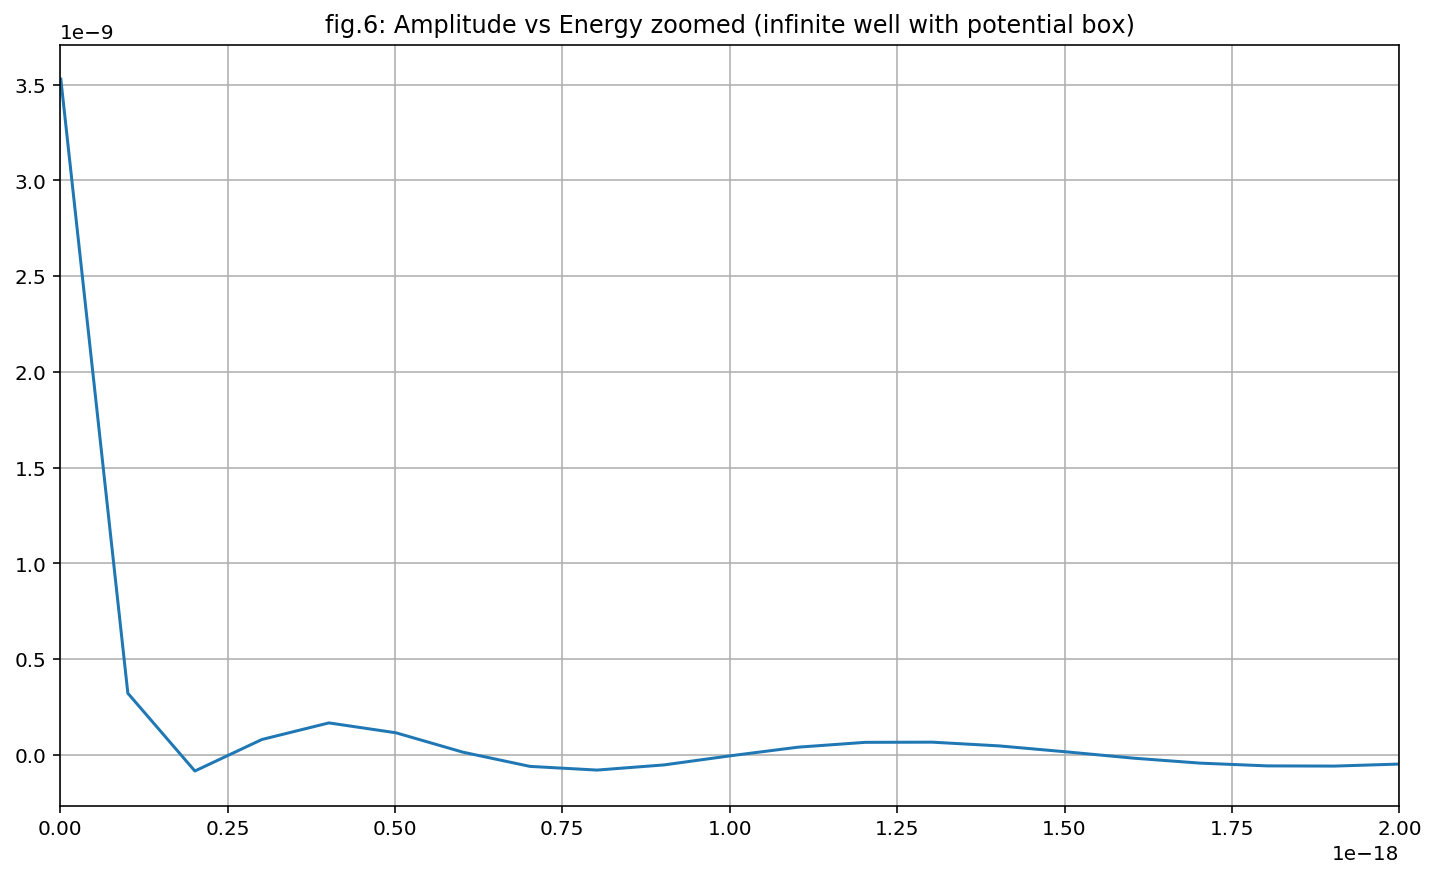

In [9]:
plt.plot(energy_list_box, amp_list_box)
plt.grid()
plt.xlim(0, 0.2*1e-17)
plt.title("fig.6: Amplitude vs Energy zoomed (infinite well with potential box)")

Subsequently, we calculated the values of the energy that satisfy our equation.


In [10]:
def right_boundary_box(E):
    psi_left = 0
    dpsi_left = 1
    sol_first_well = solve_ivp(derivative_schro_pot, (xmin, xmin_well), [psi_left, dpsi_left], t_eval = first_well, args = (E, first_well_V))
    sol_box = solve_ivp(derivative_schro_pot, (xmin_well, xmax_well), [sol_first_well.y[0][-1], sol_first_well.y[1][-1]], t_eval = box, args = (E, box_V))
    sol_second_well = solve_ivp(derivative_schro_pot, (xmax_well, xmax), [sol_box.y[0][-1], sol_box.y[1][-1]], t_eval = second_well, args = (E, second_well_V))
    return sol_second_well.y[0][-1]

def bisection_step_box(f, bounds):
    """Performs one step of the bisection algorithm to locate a root of f,
    and returns a smaller range in which the root is found.

    f: function of a single variable with a root within bounds
    bounds: tuple of two numbers representing the range to search for the root"""

    lower, upper = bounds      # "Unpack" the tuple so that we can manipulate the lower and upper bound separately
    middle = (lower + upper)/2 # Calculate the midpoint

    if f(lower)*f(middle) <0: # We want this code to run if f(l) and f(m) have opposite signs. Fill in the condition here
        return (lower, middle)
    else:
        return (middle, upper)
    
print("{:^20}  {:^25}  {:^20}  {:^14}".format("lower", "upper", "upper-lower", "iterations"))
l, u = 0.1e-18, 0.23e-18
iterations = 0
while u - l > 1e-22:
    l, u = bisection_step_box(right_boundary_box, (l, u))
    iterations = iterations + 1
    print("{:15.20f}  {:15.20f}  {:15.20f}  {:15.20f}".format(l, u, u-l, iterations))
    
print("{:^20}  {:^25}  {:^20}  {:^14}".format("lower", "upper", "upper-lower", "iterations"))
l, u = 0.23e-18, 0.3e-18
iterations = 0
while u - l > 1e-22:
    l, u = bisection_step_box(right_boundary_box, (l, u))
    iterations = iterations + 1
    print("{:15.20f}  {:15.20f}  {:15.20f}  {:15.20f}".format(l, u, u-l, iterations))
    
print("{:^20}  {:^25}  {:^20}  {:^14}".format("lower", "upper", "upper-lower", "iterations"))
l, u = 0.50e-18, 0.75e-18
iterations = 0
while u - l > 1e-22:
    l, u = bisection_step_box(right_boundary_box, (l, u))
    iterations = iterations + 1
    print("{:15.20f}  {:15.20f}  {:15.20f}  {:15.20f}".format(l, u, u-l, iterations))

       lower                    upper                upper-lower         iterations  
0.00000000000000000010  0.00000000000000000016  0.00000000000000000006  1.00000000000000000000
0.00000000000000000013  0.00000000000000000016  0.00000000000000000003  2.00000000000000000000
0.00000000000000000013  0.00000000000000000015  0.00000000000000000002  3.00000000000000000000
0.00000000000000000014  0.00000000000000000015  0.00000000000000000001  4.00000000000000000000
0.00000000000000000014  0.00000000000000000014  0.00000000000000000000  5.00000000000000000000
0.00000000000000000014  0.00000000000000000014  0.00000000000000000000  6.00000000000000000000
0.00000000000000000014  0.00000000000000000014  0.00000000000000000000  7.00000000000000000000
0.00000000000000000014  0.00000000000000000014  0.00000000000000000000  8.00000000000000000000
0.00000000000000000014  0.00000000000000000014  0.00000000000000000000  9.00000000000000000000
0.00000000000000000014  0.00000000000000000014  0.000000000

0.00000000000000000062  0.00000000000000000062  0.00000000000000000000  10.00000000000000000000
0.00000000000000000062  0.00000000000000000062  0.00000000000000000000  11.00000000000000000000
0.00000000000000000062  0.00000000000000000062  0.00000000000000000000  12.00000000000000000000


#### Results

In order to find the values of $n$ we manipulated eq.\(2\):

$$
\begin{equation}
n = \sqrt{\frac{2mEL^2}{\pi^2 \hbar^2}}\tag{3}
\end{equation}
$$

Table 1: Shows the values of the energy required to satisfy the wave equation to find $n$ for the infinite well

| Energy for each n | Energy |
| :---------------- | :--------------------- |
| E1 | 0.00000000000000000006 |
| E2 | 0.00000000000000000026 |
| E3 | 0.00000000000000000054 |



By using the results for the energy in \(Table 1\), we solved eq.\(3\) in order to find the first 3 values of $n$ for the infinite well.


In [11]:
L = 1e-9
m = 9.11e-31
En1 = 0.00000000000000000006
n1 = sqrt((2 * m * (L**2) * En1) / ((np.pi**2) * (hbar**2)))
print (n1)

L = 1e-9
m = 9.11e-31
En2 = 0.00000000000000000024
n2 = sqrt((2 * m * (L**2) * En2) / ((np.pi**2) * (hbar**2)))
print (n2)

L = 1e-9
m = 9.11e-31
En3 = 0.00000000000000000054
n3 = sqrt((2 * m * (L**2) * En3) / ((np.pi**2) * (hbar**2)))
print (n3)

0.9979844576289771
1.9959689152579543
2.9939533728869314


Table 2: Shows the values of the energy required to satisfy the wave equation to find $n$ for the infinite well with a potential box

| Energy for each n | Energy |
| :---------------- | :--------------------- |
| E1 | 0.00000000000000000014 |
| E2 | 0.00000000000000000024 |
| E3 | 0.00000000000000000062 |



Once again, we use the results for the energy in \(Table 2\), we solve eq.\(3\) in order to find the first 3 values of $n$ for the infinite well with a potential box.


In [12]:
L = 1e-9
m = 9.11e-31
En1 = 0.00000000000000000014
n1 = sqrt((2 * m * (L**2) * En1) / ((np.pi**2) * (hbar**2)))
print (n1)

L = 1e-9
m = 9.11e-31
En2 = 0.00000000000000000026
n2 = sqrt((2 * m * (L**2) * En2) / ((np.pi**2) * (hbar**2)))
print (n2)

L = 1e-9
m = 9.11e-31
En3 = 0.00000000000000000062
n3 = sqrt((2 * m * (L**2) * En3) / ((np.pi**2) * (hbar**2)))
print (n3)

1.5244464398247457
2.077470313441891
3.2080711914242754


Table 3: Compares the $n$ values of the inifinite well and the infinite well with a potetial box for each energy level

| Energy | n values \(Infinite well\) | n values \(infinite well with a potential box\) |
| :----- | :------------------------- | :---------------------------------------------- |
| E1 | 0.9979844576289771 | 1.5244464398247457 |
| E2 | 1.9959689152579543 | 2.077470313441891 |
| E3 | 2.9939533728869314 | 3.2080711914242754 |



#### Discussion

The report was supposed to find the energy levels for a particle in an infinite well, and for a particle in an infinite well with a potential box. In the first case, as shown in \(Table 3\), our results are accurate and very close to the theoretical value, since we know that the values of $n$ should be close to integer numbers\[3\]. Furthermore, our values of $n$ match the parity of the respective function, since, for symmetric potential, which in this case is 0, we know that for each even parity functions, an odd value of $n$ is required\[3\], and vice versa, which is showed in the following graph. \(fig.7\)


Text(0.5, 1.0, 'fig.7: Energy levels (infinite well)')

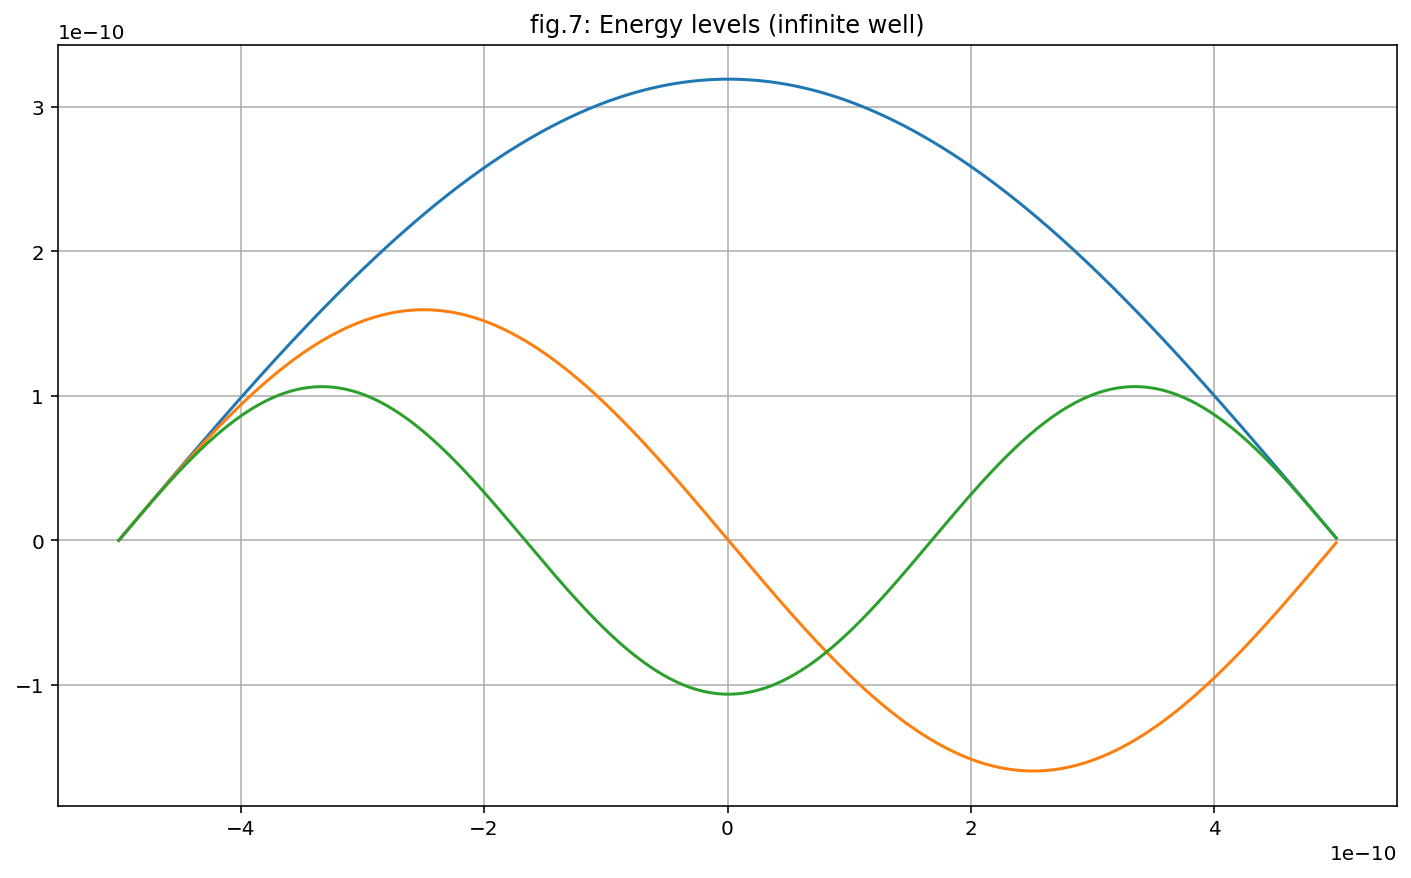

In [13]:
solution_En1 = solve_ivp(derivative_schro, (xmin, xmax), [psi_left, dpsi_left], t_eval = x_eval, args = (0.00000000000000000006, ))
plt.plot (solution_En1.t, solution_En1.y[0])

solution_En2 = solve_ivp(derivative_schro, (xmin, xmax), [psi_left, dpsi_left], t_eval = x_eval, args = (0.00000000000000000024, ))
plt.plot (solution_En2.t, solution_En2.y[0])

solution_En3 = solve_ivp(derivative_schro, (xmin, xmax), [psi_left, dpsi_left], t_eval = x_eval, args = (0.00000000000000000054, ))
plt.plot (solution_En3.t, solution_En3.y[0])
plt.grid()
plt.title("fig.7: Energy levels (infinite well)")

On the other hand, for the second case even if we have plotted the right pertubed wave function \(fig.8\), we could not get an accurate value for the energy levels. We were supposed to get integer values of $n$ also in this case, since our potential box goes from $-L/8$ to $L/8$ ; hence, our potential is symmetric. But by looking at \(Table 3\), we can see how the results are far from being integers. This happened because, we cannot always solve a perturbed wave function, but actually, we can solve just a small number of differential equations, and instead of solving them, we can get an approximated solution, by using perturbation theory\[4\].


Text(0.5, 1.0, 'fig.8: Energy levels (infinite well with potential box)')

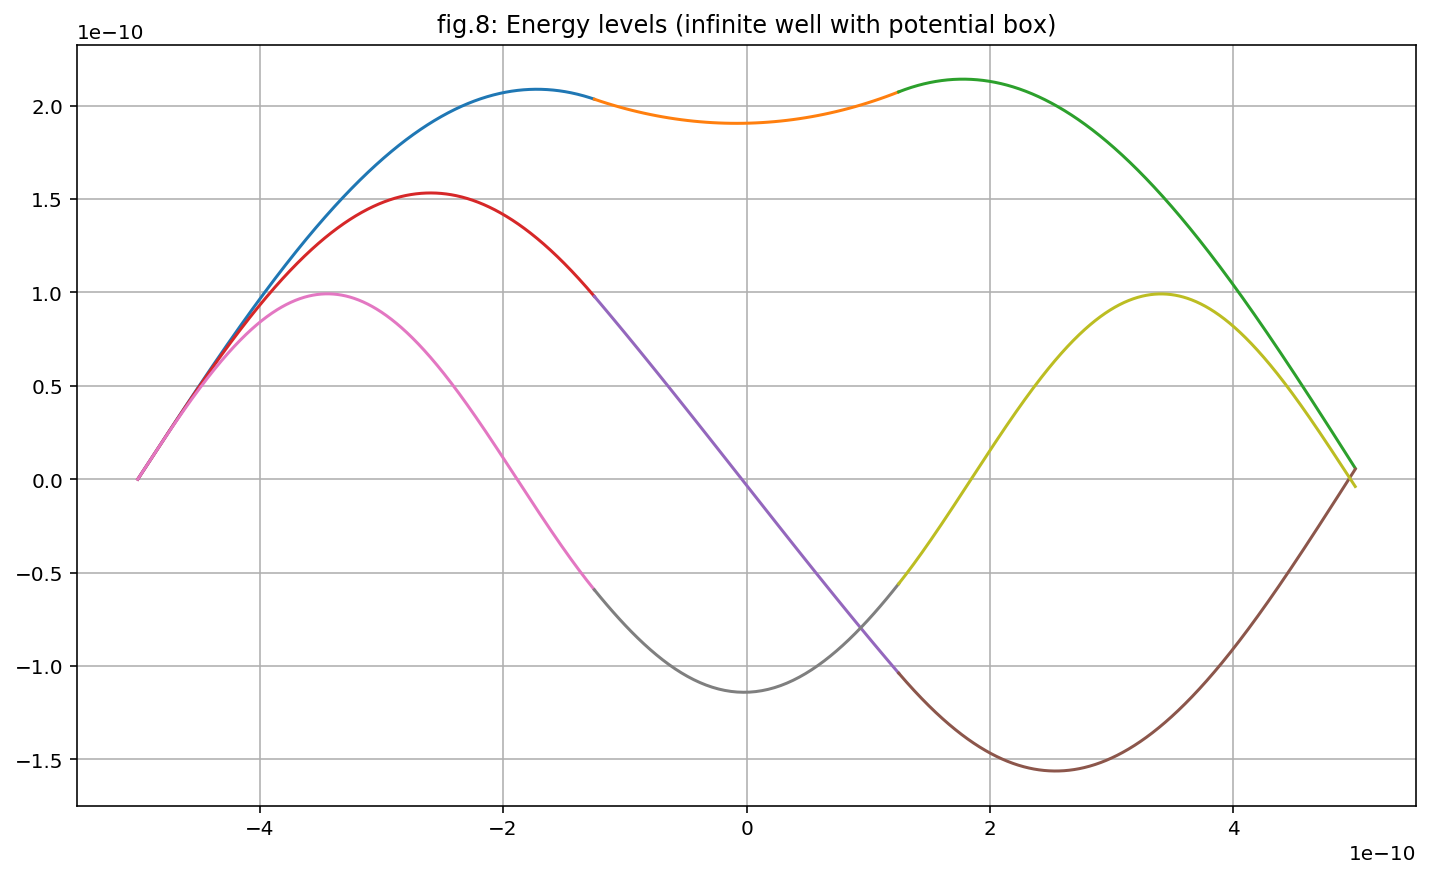

In [14]:
sol_first_well = solve_ivp(derivative_schro_pot, (xmin, xmin_well), [psi_left, dpsi_left], t_eval = first_well, args = (0.00000000000000000014, first_well_V))
sol_box = solve_ivp(derivative_schro_pot, (xmin_well, xmax_well), [sol_first_well.y[0][-1], sol_first_well.y[1][-1]], t_eval = box, args = (0.00000000000000000014, box_V))
sol_second_well = solve_ivp(derivative_schro_pot, (xmax_well, xmax), [sol_box.y[0][-1], sol_box.y[1][-1]], t_eval = second_well, args = (0.00000000000000000014, second_well_V))
plt.plot (sol_first_well.t, sol_first_well.y[0])
plt.plot (sol_box.t, sol_box.y[0])
plt.plot (sol_second_well.t, sol_second_well.y[0])
plt.grid()

sol_first_well = solve_ivp(derivative_schro_pot, (xmin, xmin_well), [psi_left, dpsi_left], t_eval = first_well, args = (0.00000000000000000026, first_well_V))
sol_box = solve_ivp(derivative_schro_pot, (xmin_well, xmax_well), [sol_first_well.y[0][-1], sol_first_well.y[1][-1]], t_eval = box, args = (0.00000000000000000026, box_V))
sol_second_well = solve_ivp(derivative_schro_pot, (xmax_well, xmax), [sol_box.y[0][-1], sol_box.y[1][-1]], t_eval = second_well, args = (0.00000000000000000026, second_well_V))
plt.plot (sol_first_well.t, sol_first_well.y[0])
plt.plot (sol_box.t, sol_box.y[0])
plt.plot (sol_second_well.t, sol_second_well.y[0])
plt.grid()

sol_first_well = solve_ivp(derivative_schro_pot, (xmin, xmin_well), [psi_left, dpsi_left], t_eval = first_well, args = (0.00000000000000000062, first_well_V))
sol_box = solve_ivp(derivative_schro_pot, (xmin_well, xmax_well), [sol_first_well.y[0][-1], sol_first_well.y[1][-1]], t_eval = box, args = (0.00000000000000000062, box_V))
sol_second_well = solve_ivp(derivative_schro_pot, (xmax_well, xmax), [sol_box.y[0][-1], sol_box.y[1][-1]], t_eval = second_well, args = (0.00000000000000000062, second_well_V))
plt.plot (sol_first_well.t, sol_first_well.y[0])
plt.plot (sol_box.t, sol_box.y[0])
plt.plot (sol_second_well.t, sol_second_well.y[0])
plt.grid()
plt.title("fig.8: Energy levels (infinite well with potential box)")

However, by changing the value of the potential.


Text(0.5, 1.0, 'fig.9: Amplitude vs Energy zoomed (lowered potential)')

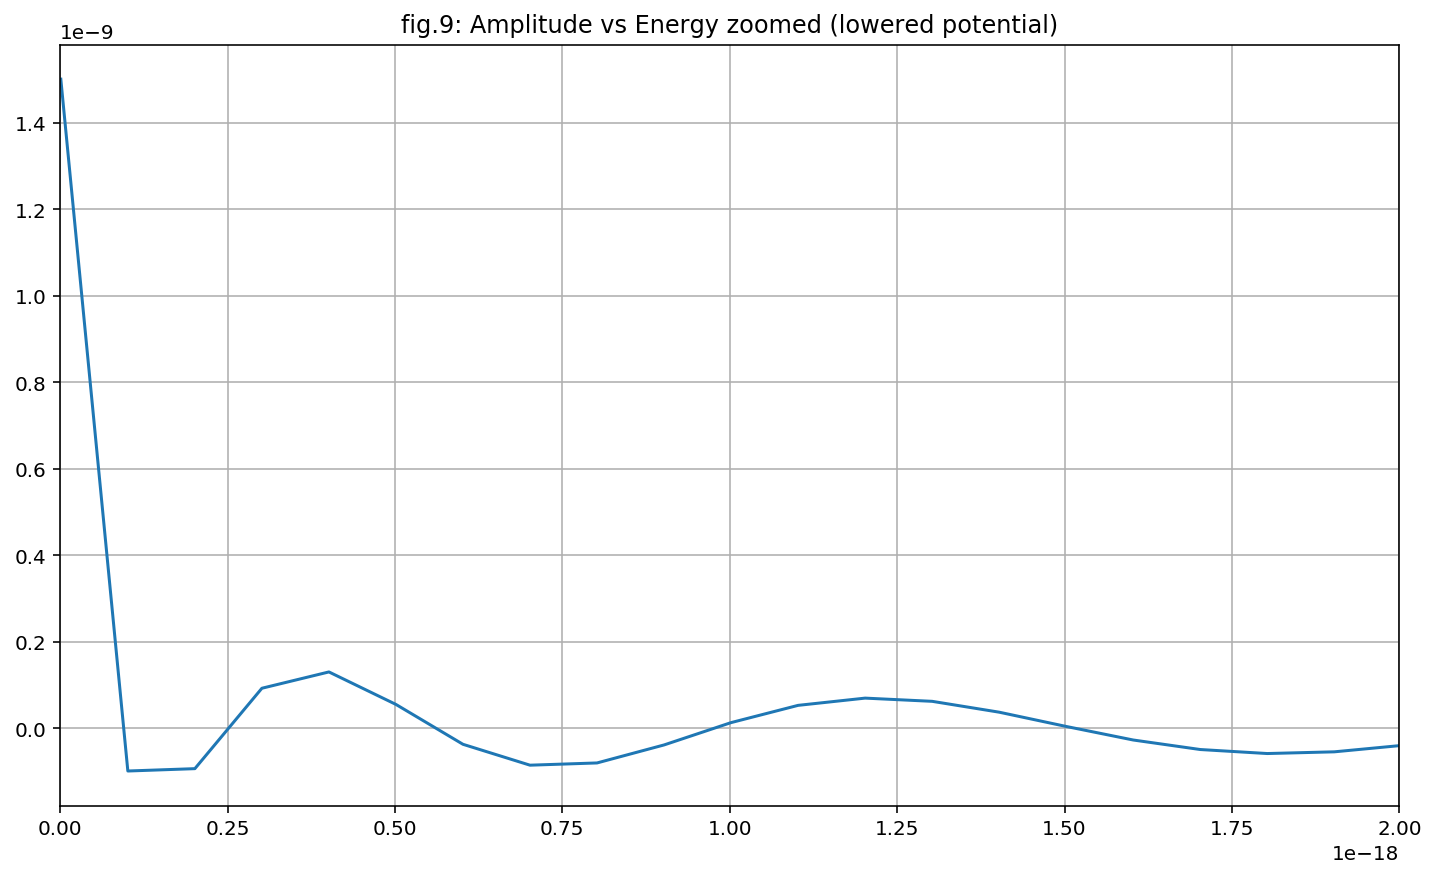

In [15]:
L = 1e-9
xmin = -L/2
xmax = L/2
xmin_well = -L/8
xmax_well = L/8
npts = 1000
first_well = np.linspace(xmin, xmin_well, npts)
first_well_V = 0
box = np.linspace(xmin_well, xmax_well)
box_V = 0.5e-19
second_well = np.linspace(xmax_well, xmax, npts)
second_well_V = 0
energy_values = np.linspace(0.01, 1000, npts)
psi_left = 0
dpsi_left = 1

energy_list_box = []
amp_list_box = []
for e in energy_values:
    En = e*(1e-19)
    energy_list_box.append(En)
    sol_first_well = solve_ivp(derivative_schro_pot, (xmin, xmin_well), [psi_left, dpsi_left], t_eval = first_well, args = (En, first_well_V))
    sol_box = solve_ivp(derivative_schro_pot, (xmin_well, xmax_well), [sol_first_well.y[0][-1], sol_first_well.y[1][-1]], t_eval = box, args = (En, box_V))
    sol_second_well = solve_ivp(derivative_schro_pot, (xmax_well, xmax), [sol_box.y[0][-1], sol_box.y[1][-1]], t_eval = second_well, args = (En, second_well_V))
    amp_list_box.append(sol_second_well.y[0][-1])


plt.plot(energy_list_box, amp_list_box)
plt.xlim(0, 0.2*1e-17)
plt.grid()
plt.title("fig.9: Amplitude vs Energy zoomed (lowered potential)")

In [16]:
print("{:^20}  {:^25}  {:^20}  {:^14}".format("lower", "upper", "upper-lower", "iterations"))
l, u = 0.0e-18, 0.2e-18
iterations = 0
while u - l > 1e-22:
    l, u = bisection_step_box(right_boundary_box, (l, u))
    iterations = iterations + 1
    print("{:15.20f}  {:15.20f}  {:15.20f}  {:15.20f}".format(l, u, u-l, iterations))

       lower                    upper                upper-lower         iterations  
0.00000000000000000000  0.00000000000000000010  0.00000000000000000010  1.00000000000000000000
0.00000000000000000005  0.00000000000000000010  0.00000000000000000005  2.00000000000000000000
0.00000000000000000007  0.00000000000000000010  0.00000000000000000002  3.00000000000000000000
0.00000000000000000007  0.00000000000000000009  0.00000000000000000001  4.00000000000000000000
0.00000000000000000008  0.00000000000000000009  0.00000000000000000001  5.00000000000000000000
0.00000000000000000008  0.00000000000000000008  0.00000000000000000000  6.00000000000000000000
0.00000000000000000008  0.00000000000000000008  0.00000000000000000000  7.00000000000000000000
0.00000000000000000008  0.00000000000000000008  0.00000000000000000000  8.00000000000000000000
0.00000000000000000008  0.00000000000000000008  0.00000000000000000000  9.00000000000000000000
0.00000000000000000008  0.00000000000000000008  0.000000000

We can see, in the following graph \(fig.10\), how the energy ground states are affected by the potential box.


Text(0.5, 1.0, 'fig.10: Comparison of the ground states')

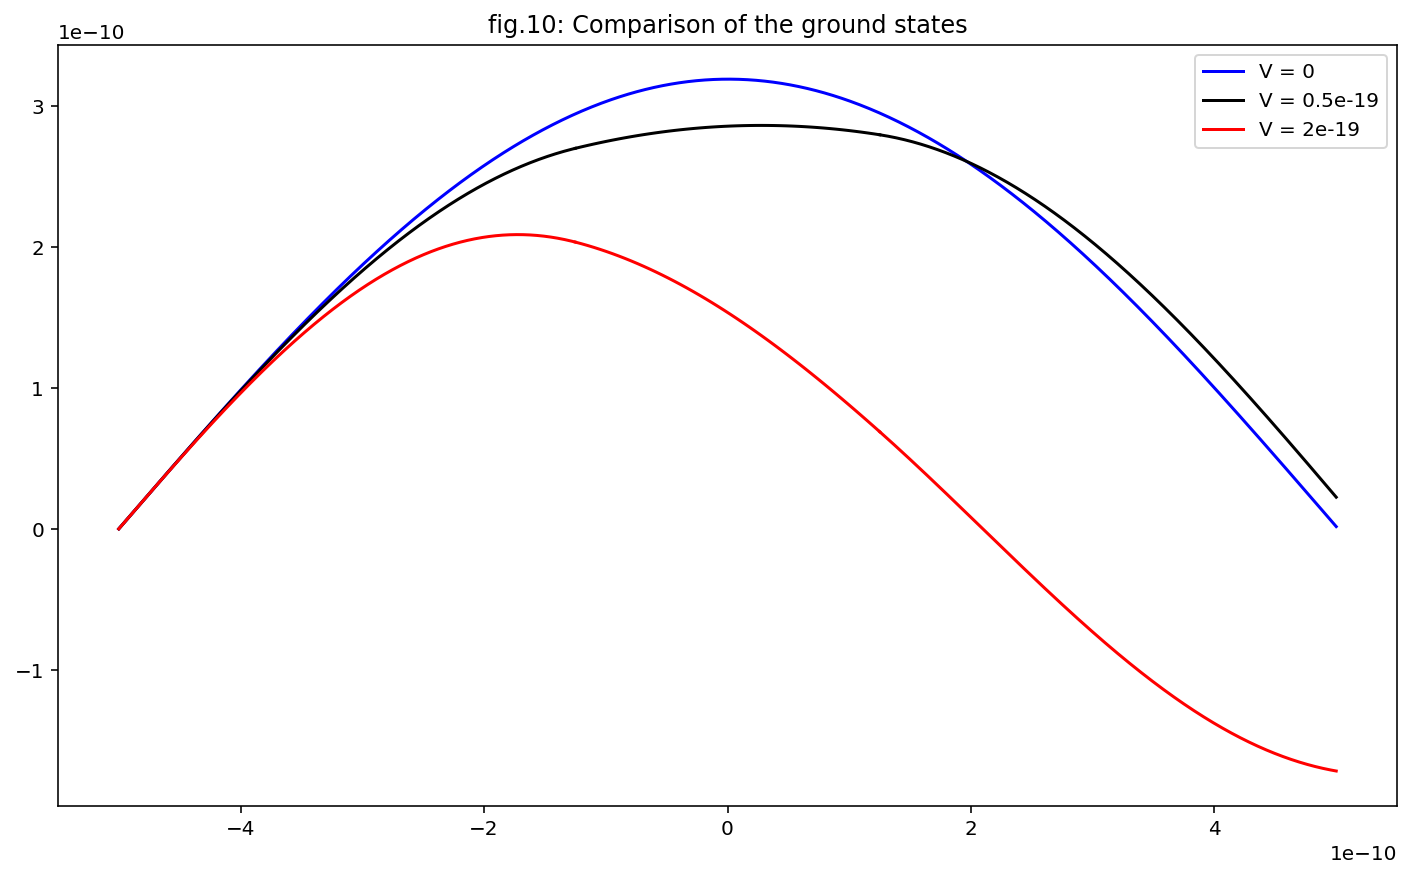

In [17]:
solution_En1 = solve_ivp(derivative_schro, (xmin, xmax), [psi_left, dpsi_left], t_eval = x_eval, args = (0.00000000000000000006, ))
plt.plot (solution_En1.t, solution_En1.y[0], label="V = 0", color="b")

sol_first_well = solve_ivp(derivative_schro_pot, (xmin, xmin_well), [psi_left, dpsi_left], t_eval = first_well, args = (0.00000000000000000008, first_well_V))
sol_box = solve_ivp(derivative_schro_pot, (xmin_well, xmax_well), [sol_first_well.y[0][-1], sol_first_well.y[1][-1]], t_eval = box, args = (0.00000000000000000008, box_V))
sol_second_well = solve_ivp(derivative_schro_pot, (xmax_well, xmax), [sol_box.y[0][-1], sol_box.y[1][-1]], t_eval = second_well, args = (0.00000000000000000008, second_well_V))
plt.plot (sol_first_well.t, sol_first_well.y[0], color = "k")
plt.plot (sol_box.t, sol_box.y[0], color = "k")
plt.plot (sol_second_well.t, sol_second_well.y[0], label="V = 0.5e-19", color = "k")
plt.grid()

sol_first_well = solve_ivp(derivative_schro_pot, (xmin, xmin_well), [psi_left, dpsi_left], t_eval = first_well, args = (0.00000000000000000014, first_well_V))
sol_box = solve_ivp(derivative_schro_pot, (xmin_well, xmax_well), [sol_first_well.y[0][-1], sol_first_well.y[1][-1]], t_eval = box, args = (0.00000000000000000014, box_V))
sol_second_well = solve_ivp(derivative_schro_pot, (xmax_well, xmax), [sol_box.y[0][-1], sol_box.y[1][-1]], t_eval = second_well, args = (0.00000000000000000014, second_well_V))
plt.plot (sol_first_well.t, sol_first_well.y[0], color = "r")
plt.plot (sol_box.t, sol_box.y[0], color = "r")
plt.plot (sol_second_well.t, sol_second_well.y[0], label="V = 2e-19", color = "r")
plt.grid()
plt.legend()
plt.title("fig.10: Comparison of the ground states")

#### Conclusion

To sum up, the results of the values of $n$ for the infinite well are more accurate, while the results of the energy levels for the infinite well with a potential can be made more precise by using the perturbation theory. Although, the wave equations are well picturized by the graphs.


#### References

1.The time independent Schrödinger equation. \[cited 2023Jan4\]. Available from: [https://quantummechanics.ucsd.edu/ph130a/130\_notes/node124.html](https://quantummechanics.ucsd.edu/ph130a/130_notes/node124.html) 

2.Chapter 7 the Schroedinger equation in one dimension a \- UCI \[Internet\]. \[cited 2023Jan1\]. Available from: [https://ps.uci.edu/~cyu/p51A/LectureNotes/Chapter7/Chapter7.pdf ](https://ps.uci.edu/~cyu/p51A/LectureNotes/Chapter7/Chapter7.pdf)

3.Infinite Square well \- University of New Mexico \[Internet\]. \[cited 2023Jan5\]. Available from: https://physics.unm.edu/Courses/Fields/Phys491/Notes/TISEInfiniteSquare.pdf  

4.Lecture 17 \- School of Physics and astronomy \[Internet\]. \[cited 2023Jan4\]. Available from: https://www2.ph.ed.ac.uk/~ldeldebb/docs/QM/lect17.pdf  

